In [33]:
import sys
sys.path.insert(0, "..")

from modules.mine_utils import read_log
from modules.utils import read_dict

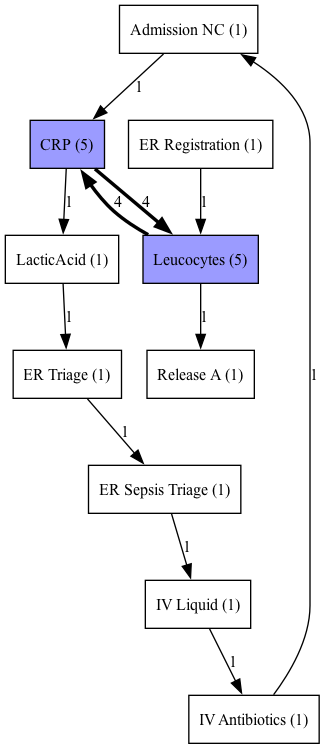

                 src               tgt  freq_0  time_mean_0  time_median_0  \
0       Admission NC               CRP       1     154001.0       154001.0   
1                CRP        LacticAcid       1          0.0            0.0   
2                CRP        Leucocytes       4     129600.0       172800.0   
3    ER Registration        Leucocytes       1        679.0          679.0   
4   ER Sepsis Triage         IV Liquid       1       8987.0         8987.0   
5          ER Triage  ER Sepsis Triage       1         23.0           23.0   
6     IV Antibiotics      Admission NC       1        572.0          572.0   
7          IV Liquid    IV Antibiotics       1          0.0            0.0   
8         LacticAcid         ER Triage       1        397.0          397.0   
9         Leucocytes               CRP       4      64800.0        43200.0   
10        Leucocytes         Release A       1      26100.0        26100.0   

    time_min_0  time_max_0  time_stdev_0  
0     154001.0    15

In [34]:
# mined model

from modules.mine_utils import mine_dfg
from modules.cmp_logs import log_to_dfg

log = read_log("data/sublog0.csv")
mine_dfg(log)

mined_dfg = log_to_dfg(log, 0)
print(mined_dfg)

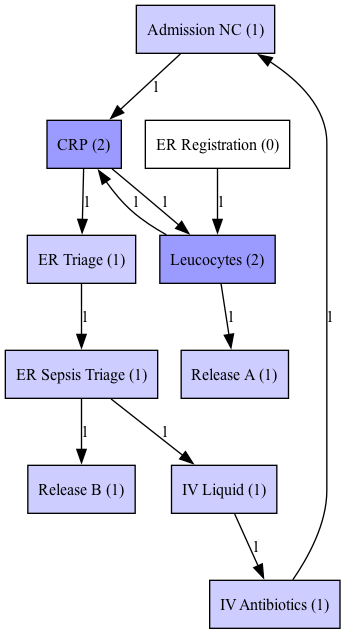

                 src               tgt  freq_1
0       Admission NC               CRP       1
1                CRP         ER Triage       1
2                CRP        Leucocytes       1
3    ER Registration        Leucocytes       1
4   ER Sepsis Triage         IV Liquid       1
5   ER Sepsis Triage         Release B       1
6          ER Triage  ER Sepsis Triage       1
7     IV Antibiotics      Admission NC       1
8          IV Liquid    IV Antibiotics       1
9         Leucocytes               CRP       1
10        Leucocytes         Release A       1


In [35]:
# normative model

from pm4py.visualization.dfg import visualizer as dfg_visualizer
from modules.cmp_logs import dict_to_dfg

norm_dict = read_dict("data/norm.py")
dfg_visualizer.view(dfg_visualizer.apply(norm_dict))

norm_dfg = dict_to_dfg(norm_dict, 1)
print(norm_dfg)

In [38]:
from modules.cmp_logs import compare_dfgs, print_cmp_results, GroupTypes

cmp_results = compare_dfgs([ mined_dfg, norm_dfg ])

print("-- compare by log\n")
print_cmp_results(cmp_results, [ "mined", "normative" ], group_type=GroupTypes.BY_LOG)

# print("-- compare by element\n")
# print_cmp_results(cmp_results, [ "mined", "normative" ], group_type=GroupTypes.BY_ELEMENT)

-- compare by log

> mined
- compared to normative:
. extra events: LacticAcid
. missing events: Release B
. extra edges:
 CRP -> LacticAcid
LacticAcid -> ER Triage
. missing edges:
 CRP -> ER Triage
ER Sepsis Triage -> Release B


> normative
- compared to mined:
. extra events: Release B
. missing events: LacticAcid
. extra edges:
 CRP -> ER Triage
ER Sepsis Triage -> Release B
. missing edges:
 CRP -> LacticAcid
LacticAcid -> ER Triage


